In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools
import datetime as dt
from scipy import stats

In [2]:
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')
import os
import gc

In [3]:
#Setting styles and aesthetics
pd.options.display.max_columns =200
pd.options.display.max_rows =30
pd.options.display.float_format = '{:,.2f}'.format

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18, 8)

# Graphics in SVG format are more sharp and legible
%config InlineBackend.figure_format = 'svg'
\
%matplotlib inline

## Load data

In [4]:
uber = pd.read_csv('/home/david/Desktop/uber/train_revised.csv',parse_dates=['travel_date'],low_memory=False)
test = pd.read_csv('/home/david/Desktop/uber/test_questions.csv',parse_dates=['travel_date'], low_memory=False)

In [5]:
uber.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,7:12,Migori,Nairobi,Bus,49


In [6]:
test.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,247,2018-05-07,07:06,Kisii,Nairobi,Bus,49
1,256,2018-05-06,11:08,Kisii,Nairobi,shuttle,11
2,275,2018-05-04,05:00,Kisii,Nairobi,shuttle,11
3,285,2018-05-04,09:10,Kisii,Nairobi,shuttle,11
4,286,2018-05-04,09:20,Kisii,Nairobi,shuttle,11


## Data Dimension

In [7]:
# Check The Shape Of The Data Loaded
print('Uber shape: {} Rows, {} Columns'.format(*uber.shape))
print('Test shape: {} Rows, {} Columns'.format(*test.shape))

Uber shape: 51645 Rows, 10 Columns
Test shape: 1111 Rows, 7 Columns


## Data Exploration

### Get first hand feeling of the data

####  Column/Variable Names

##### Variable names of the data. You may create your own variable names

In [8]:
display("Uber")
display(uber.columns)
display("Test")
display(test.columns)

'Uber'

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

'Test'

Index(['ride_id', 'travel_date', 'travel_time', 'travel_from', 'travel_to',
       'car_type', 'max_capacity'],
      dtype='object')

Let's look at the number of columns of each data type. int64 and float64 are numeric variables (which can be either discrete or continuous). object columns contain strings and are categorical features.

In [9]:

# Number of each type of column
display("Uber")
display(uber.dtypes.value_counts())
display("test")
display(test.dtypes.value_counts())

'Uber'

object            7
int64             2
datetime64[ns]    1
dtype: int64

'test'

object            4
int64             2
datetime64[ns]    1
dtype: int64

##  Structure of the Data
### Use pandas profiling to get summary details of each dataset

In [10]:
import pandas_profiling


In [11]:
profile = pandas_profiling.ProfileReport(test)
profile.to_file(outputfile="/home/david/Desktop/uber/html/test.html")

In [12]:
profile = pandas_profiling.ProfileReport(uber)
profile.to_file(outputfile="/home/david/Desktop/uber/html/uber.html")

In [13]:
#ride_id_dict = {} 
#for ride_id in uber["ride_id"]:
#    if not ride_id in ride_id_dict:
#        ride_id_dict[ride_id] = 1
#   else:
#      ride_id_dict[ride_id] += 1

In [14]:
uber.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,2017-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,2017-11-19,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,2017-11-26,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,2017-11-27,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,2017-11-27,7:12,Migori,Nairobi,Bus,49


In [15]:
uber = uber.drop(['seat_number', 'payment_method', 'payment_receipt', 'travel_to'], axis=1)


In [16]:
uber.drop_duplicates(inplace=True)
uber.reset_index(drop= True, inplace=True)

In [17]:
test.drop_duplicates(inplace=True)
test.reset_index(drop= True, inplace=True)

In [18]:
for i in range(len(uber)):
    ride_id = uber.loc[i]["ride_id"]
    uber.at[i,"number_of_tickets"] = ride_id_dict[ride_id]

NameError: name 'ride_id_dict' is not defined

In [ ]:
uber.head(10)


In [ ]:
uber.info()

In [ ]:
test.info()


Let us start our exploration proper.



In [ ]:
sns.barplot(x='car_type',y='max_capacity',data=uber)

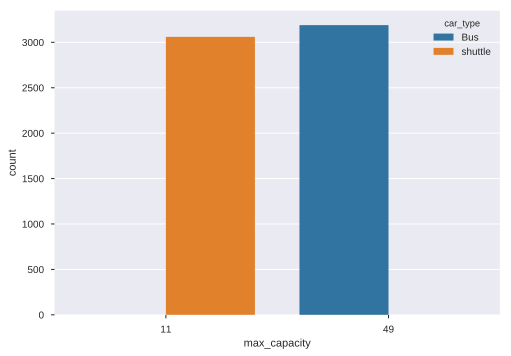

In [350]:
sns.countplot(x='max_capacity',data=uber,hue='car_type')

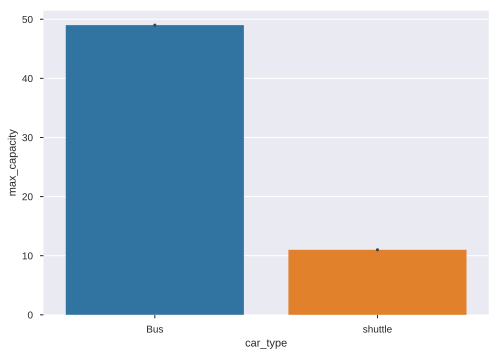

In [351]:
sns.barplot(x='car_type',y='max_capacity',data=test)


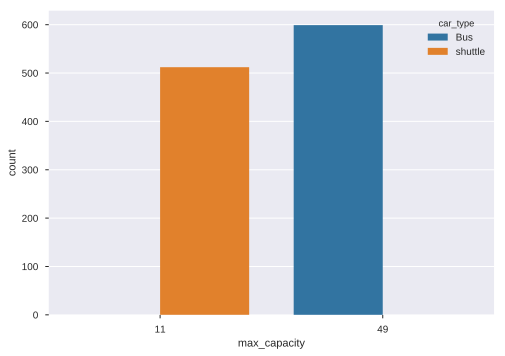

In [352]:
sns.countplot(x='max_capacity',data=test,hue='car_type')



It can be seen that the training is fairly representative of the test set. This is important as we want our unseen scenerios to be similar to the seen scenerios to make our models as accurate as possible

Another thing that is worth exploring is the travel times. Are they horly in nature? Are they just morning journeys? etc. To do this, we have to convert the travel times to meaning numerical data. One way will be to just extract the hour term. Another way is to convert is to minutes from midnight (another valuable insight provided by the community).



In [353]:
#Extracting the hour term
uber['hour_booked'] = pd.to_numeric(uber['travel_time'].str.extract(r'(^\d*)').loc[:,0])
test['hour_booked'] = pd.to_numeric(test['travel_time'].str.extract(r'(^\d*)').loc[:,0])

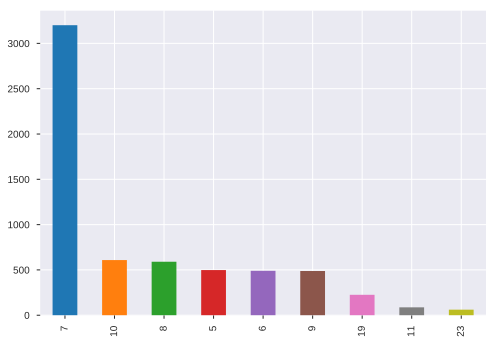

In [354]:
uber['hour_booked'].value_counts().plot.bar()


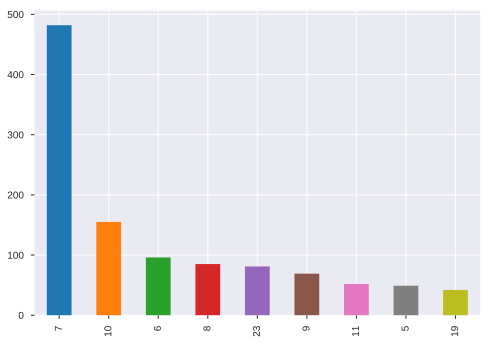

In [355]:
test['hour_booked'].value_counts().plot.bar()


In [356]:

#express travel time in minutes from midnight
test["travel_time"] = test["travel_time"].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
uber["travel_time"] = uber["travel_time"].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

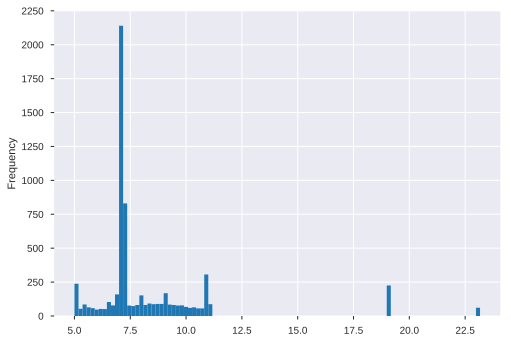

In [357]:
(uber["travel_time"]/60).plot.hist(bins=100)


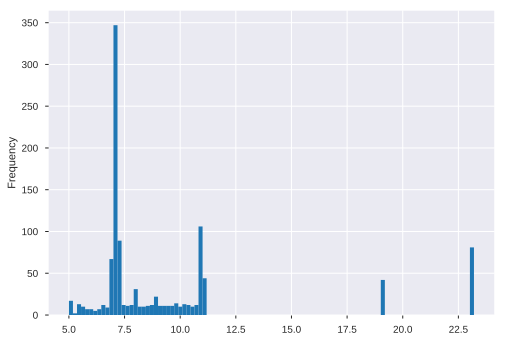

In [358]:
(test["travel_time"]/60).plot.hist(bins=100)


Both methods gave us almost the same information about the data. The most frequent travel time is around 7am and most of the journeys take place before noon with some journeys at 7pm and 11pm.

Another column to explore is travel from i.e where do most of our customers come from?



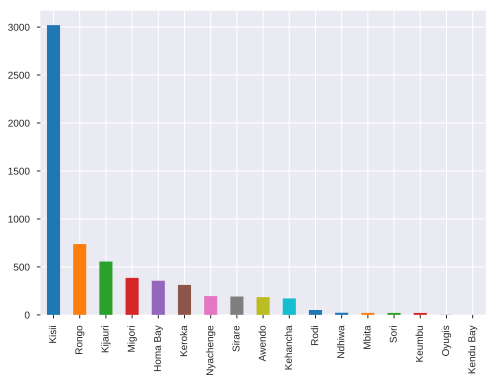

In [359]:
uber['travel_from'].value_counts().plot.bar()

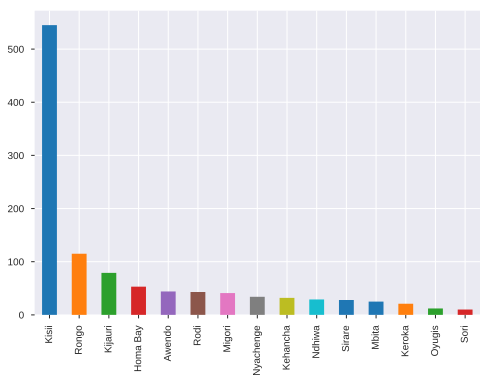

In [360]:
test['travel_from'].value_counts().plot.bar()

So many of our customers are actually coming from Kisii. The training set is fairly representative of the test set too.

We can also explore to see if people are likely to travel on a particular day of the week more than the rest.

In [361]:

uber["travel_day"] = uber["travel_date"].dt.day_name()
test["travel_day"] = test["travel_date"].dt.day_name()

In [362]:
uber["travel_yr"] = uber["travel_date"].dt.year
test["travel_yr"] = test["travel_date"].dt.year

In [363]:

#Calculating the number of weeks in the dataset we have data for
a=uber[uber["travel_yr"]==2018]["travel_date"].dt.week.nunique() + uber[uber["travel_yr"]==2017]["travel_date"].dt.week.nunique()
b=test[test["travel_yr"]==2018]["travel_date"].dt.week.nunique() + test[test["travel_yr"]==2017]["travel_date"].dt.week.nunique()

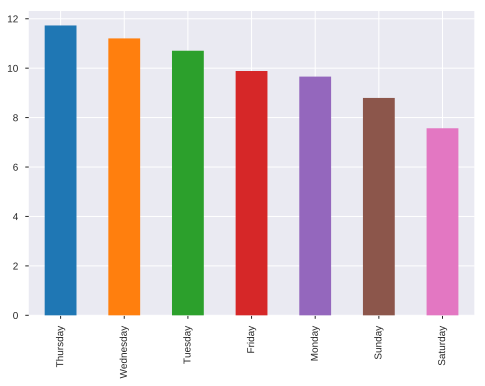

In [364]:
(uber[uber['car_type']=='shuttle']["travel_day"].value_counts()/a).plot.bar()


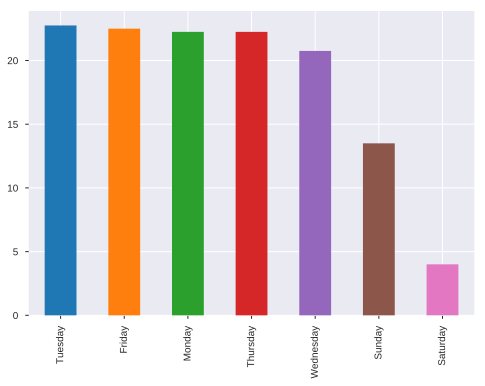

In [365]:
(test[test['car_type']=='shuttle']["travel_day"].value_counts()/b).plot.bar()


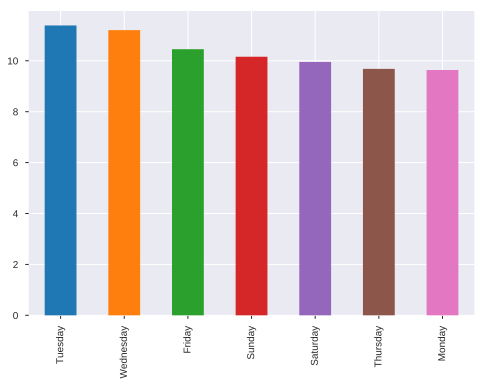

In [366]:
(uber[uber['car_type']=='Bus']["travel_day"].value_counts()/a).plot.bar()


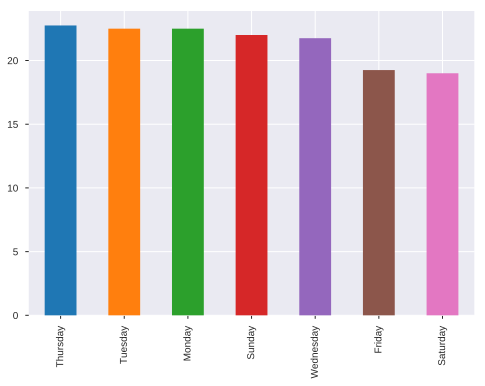

In [367]:
(test[test['car_type']=='Bus']["travel_day"].value_counts()/b).plot.bar()


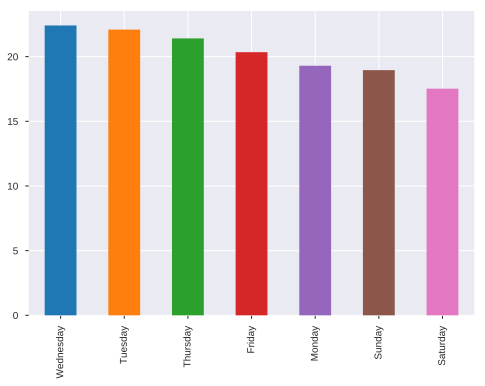

In [368]:
(uber["travel_day"].value_counts()/a).plot.bar()


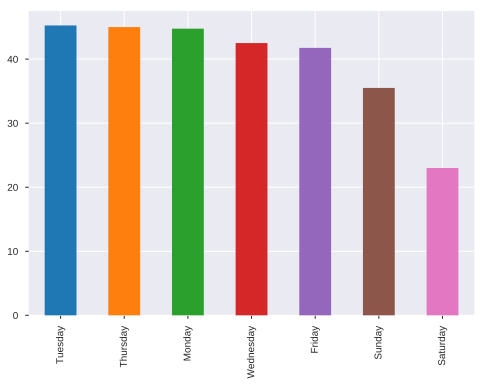

In [369]:
(test["travel_day"].value_counts()/b).plot.bar()


From the above analysis, there seem to be no clear indication that the day of the week matters as the average people that travel on a particular day seems to change with context.

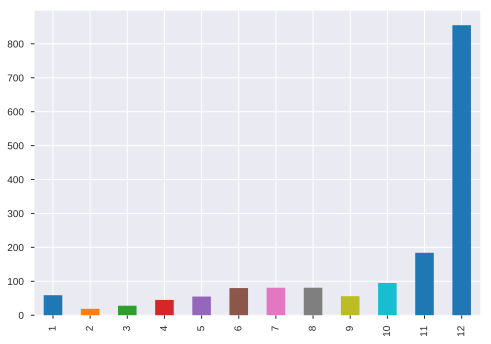

In [370]:
uber[uber["travel_yr"]==2017]["travel_date"].dt.month.value_counts().sort_index().plot.bar()


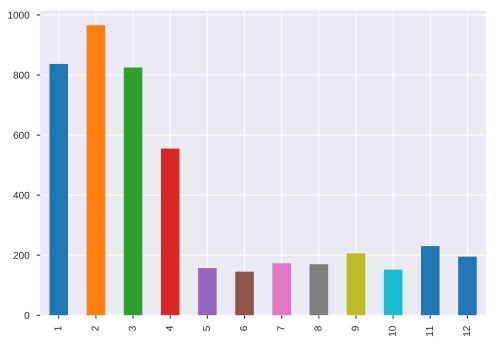

In [371]:
uber[uber["travel_yr"]==2018]["travel_date"].dt.month.value_counts().sort_index().plot.bar()


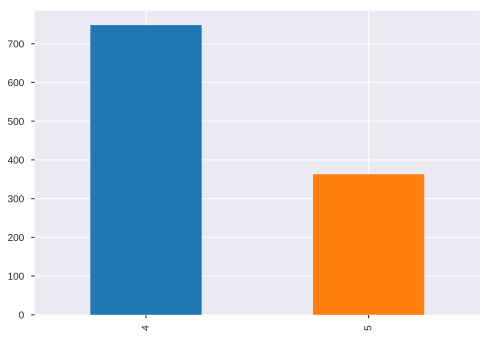

In [372]:
test[test["travel_yr"]==2018]["travel_date"].dt.month.value_counts().sort_index().plot.bar()



It is clear that from the exploration above that there is something inconsistent about the travel date in the training set. There shouldn't be data for anytime earlier time earlier than Oct 2017 and later than April 2018. This make the date an unreliable indicator. Thus, any date-related feature is unnecessary for modelling.

Lastly we can check to see the distribution for ticket sales

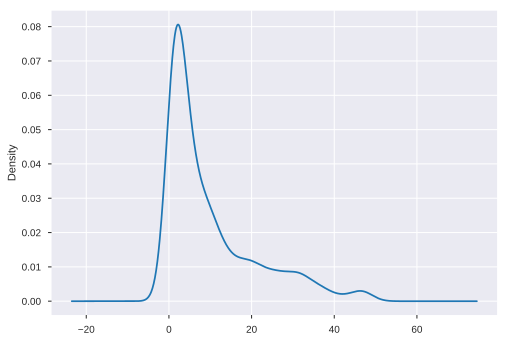

In [373]:
((uber[uber['car_type']=='Bus']['number_of_tickets'])).plot.density()


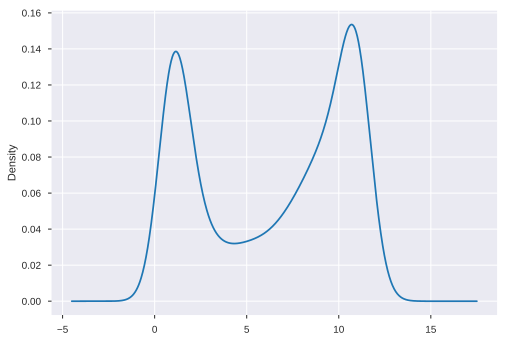

In [374]:
((uber[uber['car_type']=='shuttle']['number_of_tickets'])).plot.density()


It can be seen that for buses, the bus is usually almost empty while for the shuttles, they are almost always full or empty.



In [375]:

uber = uber[['travel_time','travel_from','car_type','number_of_tickets','hour_booked']]
uber.head()

,travel_time,travel_from,car_type,number_of_tickets,hour_booked
0,435,Migori,Bus,1.00,7
1,432,Migori,Bus,1.00,7
2,425,Keroka,Bus,1.00,7
3,430,Homa Bay,Bus,5.00,7
4,432,Migori,Bus,31.00,7


## Feature Engineering


In [376]:
#Trying to linearize the travel time feature for better prediction
uber['travel_time_log']=np.log(uber['travel_time'])
test['travel_time_log']=np.log(test['travel_time'])

We proceed to create two features: late night and early morning based on our EDA.



In [377]:
uber['early_morning']=uber['hour_booked']<8
test['early_morning']=test['hour_booked']<8
uber['late_night']=uber['hour_booked']>18
test['late_night']=test['hour_booked']>18

We use the uber .corr function and seaborn's heatmap to see if there is any linear relationships between our features and targets



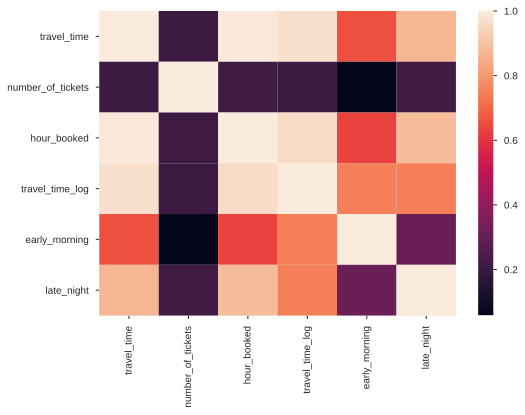

In [378]:
sns.heatmap(abs(uber.corr()))


There seem to be no strong relationship between all of our features and target.

We now try to incoporate an external data - distance from town to Nairobi.



In [379]:
distance={'Migori':370.9,'Keroka':279.8,'Kisii':305.5,'Homa Bay':305.5,'Keumbu':294.0,
        'Rongo':330.3,'Kijauri':276.6,'Oyugis':331.1,'Awendo':349.5,
        'Sirare':391.9,'Nyachenge':322.8,'Kehancha':377.5,
        'Kendu Bay':367.5,'Sori':392,'Rodi':349.1,'Mbita':399.4,
        'Ndhiwa':369.6}

In [380]:
uber['distance']=uber['travel_from'].map({k:v for k,v in distance.items()})
test['distance']=test['travel_from'].map({k:v for k,v in distance.items()})

In [381]:
test=pd.get_dummies(test,prefix=['car_type','travel_from'],columns=['car_type','travel_from'])
uber=pd.get_dummies(uber,prefix=['car_type','travel_from'],columns=['car_type','travel_from'])

# MODELLING


In [382]:
print("Original features:\n", (list(uber.columns)), "\n")


Original features:
 ['travel_time', 'number_of_tickets', 'hour_booked', 'travel_time_log', 'early_morning', 'late_night', 'distance', 'car_type_Bus', 'car_type_shuttle', 'travel_from_Awendo', 'travel_from_Homa Bay', 'travel_from_Kehancha', 'travel_from_Kendu Bay', 'travel_from_Keroka', 'travel_from_Keumbu', 'travel_from_Kijauri', 'travel_from_Kisii', 'travel_from_Mbita', 'travel_from_Migori', 'travel_from_Ndhiwa', 'travel_from_Nyachenge', 'travel_from_Oyugis', 'travel_from_Rodi', 'travel_from_Rongo', 'travel_from_Sirare', 'travel_from_Sori'] 



In [383]:
feature_cols=['travel_time', 'hour_booked', 'travel_time_log', 'early_morning', 'late_night', 'distance', 
         'car_type_Bus', 'car_type_shuttle', 'travel_from_Awendo', 'travel_from_Homa Bay', 'travel_from_Kehancha',
         'travel_from_Kendu Bay', 'travel_from_Keroka', 'travel_from_Keumbu', 'travel_from_Kijauri', 
         'travel_from_Kisii', 'travel_from_Mbita', 'travel_from_Migori', 'travel_from_Ndhiwa', 'travel_from_Nyachenge',
         'travel_from_Oyugis', 'travel_from_Rodi', 'travel_from_Rongo', 'travel_from_Sirare', 'travel_from_Sori']

In [384]:
predicted_col=['number_of_tickets']


In [385]:
uber.head()

,travel_time,number_of_tickets,hour_booked,travel_time_log,early_morning,late_night,distance,car_type_Bus,car_type_shuttle,travel_from_Awendo,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Kendu Bay,travel_from_Keroka,travel_from_Keumbu,travel_from_Kijauri,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Oyugis,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori
0,435,1.00,7,6.08,True,False,370.90,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,432,1.00,7,6.07,True,False,370.90,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,425,1.00,7,6.05,True,False,279.80,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,430,5.00,7,6.06,True,False,305.50,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,432,31.00,7,6.07,True,False,370.90,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [386]:
test.head()

,ride_id,travel_date,travel_time,travel_to,max_capacity,hour_booked,travel_day,travel_yr,travel_time_log,early_morning,late_night,distance,car_type_Bus,car_type_shuttle,travel_from_Awendo,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Keroka,travel_from_Kijauri,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Oyugis,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori
0,247,2018-05-07,426,Nairobi,49,7,Monday,2018,6.05,True,False,305.50,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,256,2018-05-06,668,Nairobi,11,11,Sunday,2018,6.50,False,False,305.50,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,275,2018-05-04,300,Nairobi,11,5,Friday,2018,5.70,True,False,305.50,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
3,285,2018-05-04,550,Nairobi,11,9,Friday,2018,6.31,False,False,305.50,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,286,2018-05-04,560,Nairobi,11,9,Friday,2018,6.33,False,False,305.50,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [387]:
len(test.columns)


29

In [388]:
len(uber.columns)


26

In [389]:

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
# Machine learning

from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline


from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics


from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from mlxtend.classifier import StackingClassifier

from sklearn.model_selection import cross_val_score, train_test_split

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

np.random.seed(0)


%matplotlib inline

In [447]:

# Split into two sets
X=uber[feature_cols].values
Y=uber[predicted_col].values


In [449]:

#Reshaping target column to avoid Sklearb throwing in a warning 
Y_train=Y_train.ravel()

split_test_size=0.30

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [422]:
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#len(X_train)
#len(X_test)
#len(y_train)
#len(y_test)

1250

In [314]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X, y, cv):
    
    # One Pass
    model = algo.fit(X, y)
    acc = round(model.score(X, y) * 100, 2)
    
    # Cross Validation 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X, 
                                                  y, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    # Cross-validation accuracy metric
    acc_cv = round(metrics.accuracy_score(y, train_pred) * 100, 2)
    
    return train_pred, acc, acc_cv

## Logistic Regression


In [315]:
import math, time, random, datetime


In [316]:
# Logistic Regression
start_time = time.time()
train_pred_log, acc_log, acc_cv_log = fit_ml_algo(LogisticRegression(), 
                                                               X, 
                                                               y, 
                                                                    10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 31.45
Accuracy CV 10-Fold: 29.75
Running Time: 0:00:13.554272


## K-Nearest Neighbours


In [317]:
# k-Nearest Neighbours
start_time = time.time()
train_pred_knn, acc_knn, acc_cv_knn = fit_ml_algo(KNeighborsClassifier(), 
                                                  X, 
                                                  y, 
                                                  10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 26.63
Accuracy CV 10-Fold: 24.08
Running Time: 0:00:00.538187


## Gaussian Naive Bayes


In [318]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, acc_gaussian, acc_cv_gaussian = fit_ml_algo(GaussianNB(), 
                                                                      X, 
                                                                      y, 
                                                                           10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

Accuracy: 15.92
Accuracy CV 10-Fold: 15.35
Running Time: 0:00:00.410126


## Linear Support Vector Machines (SVC)

In [319]:

# Linear SVC
start_time = time.time()
train_pred_svc, acc_linear_svc, acc_cv_linear_svc = fit_ml_algo(LinearSVC(),
                                                                X, 
                                                                y, 
                                                                10)
linear_svc_time = (time.time() - start_time)
print("Accuracy: %s" % acc_linear_svc)
print("Accuracy CV 10-Fold: %s" % acc_cv_linear_svc)
print("Running Time: %s" % datetime.timedelta(seconds=linear_svc_time))

Accuracy: 0.43
Accuracy CV 10-Fold: 9.89
Running Time: 0:01:38.837852


## Stochastic Gradient Descent

In [ ]:
# Stochastic Gradient Descent
start_time = time.time()
train_pred_sgd, acc_sgd, acc_cv_sgd = fit_ml_algo(SGDClassifier(), 
                                                  X, 
                                                  y,
                                                  10)
sgd_time = (time.time() - start_time)
print("Accuracy: %s" % acc_sgd)
print("Accuracy CV 10-Fold: %s" % acc_cv_sgd)
print("Running Time: %s" % datetime.timedelta(seconds=sgd_time))

Accuracy: 0.9
Accuracy CV 10-Fold: 7.09
Running Time: 0:00:03.369772


## Decision Tree Classifier


In [321]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, acc_dt, acc_cv_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                                X, 
                                                                y
                                                                10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 33.85
Accuracy CV 10-Fold: 29.88
Running Time: 0:00:00.321796


## Gradient Boost Trees


In [ ]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, acc_gbt, acc_cv_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                       X, 
                                                                       y,
                                                                       10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

In [323]:
#Since we will evaluate a few models, let's define a function that prints out the scores we care about
def print_scores(regressor, X_train, y_train, X_test, y_test, oob_score=True):
    print("Train score: " + str(regressor.score(X_train, y_train)))
    print("Test score: " + str(regressor.score(X_test, y_test)))
    print("OOB score: " + str(regressor.oob_score))

## Random forest


In [ ]:
# Step 1: Initiating the bagging regressor algorithm
rf_regressor = RandomForestRegressor(n_estimators=10, oob_score=True, min_samples_leaf = 8,random_state = 20)
# Step 2: Training the bagging regressor algorithm
rf_regressor.fit(X,y)

# Step 3: Calculating the score of the predictive power on the training and testing dataset.
print_scores(rf_regressor, X_train, y_train, X_test, y_test, oob_score=True)

## Linear Regression

In [ ]:
# Linear Regression

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
model1 = regr.fit(X,y)
print(model1)

In [ ]:
# Step 3: Calculating the score of the predictive power on the training and testing dataset.
linear_training_score = model1.score(X_train, y_train)
linear_testing_score = model1.score(X_test, y_test)
print("Train score: " + str(linear_training_score))
print("Test score: " + str(linear_testing_score))
clf= DecisionTreeClassifier(max_depth=3)

## Bagging


In [ ]:
from sklearn.ensemble import BaggingRegressor
# Step 1: Initiating the bagging regressor algorithm
bagging_regressor = BaggingRegressor(oob_score=True)
# Step 2: Training the bagging regressor algorithm
bagging_regressor.fit(X,y)
# Step 3: Calculating the score of the predictive power on the training and testing dataset.
br_training_score = bagging_regressor.score(X_train, y_train)
br_testing_score = bagging_regressor.score(X_test, y_test)
br_oob_score = bagging_regressor.oob_score_
print("Train score: " + str(br_training_score))
print("Test score: " + str(br_testing_score))
print("Oob score: " + str(br_oob_score))

In [ ]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 'Naive Bayes', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree' , 'Gradient Boosting Trees',
               ],
    'Score': [
        acc_knn, 
        acc_log,  
        acc_gaussian, 
        acc_sgd, 
        acc_linear_svc, 
        acc_dt,
        acc_gbt,
        
       
    ]})
print("---Reuglar Accuracy Scores---")
#models.sort_values(by='Score', ascending=False)

In [ ]:
models.sort_values(by='Score', ascending=False)

## AVERAGING 

In [ ]:
acc_dt = tree.DecisionTreeClassifier()
acc_gbt = KNeighborsClassifier()
acc_log= LogisticRegression()

acc_dt.fit(X,y)
acc_gbt.fit(X,y)
acc_log.fit(X,y)

pred1=acc_dt.predict_proba(X_test)
pred2=acc_gbt.predict_proba(X_test)
pred3=acc_log.predict_proba(X_test)

finalpred=(pred1+pred2+pred3)/3

In [ ]:
print(finalpred)

# Stacking model

In [450]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
#X_train, X_test, Y_train, Y_test= train_test_split(X,Y, random_state=260)
#X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [451]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold
kfold=KFold(n_splits=5)
from sklearn.preprocessing import PolynomialFeatures,MinMaxScaler,StandardScaler
poly=PolynomialFeatures(degree=1).fit(X_train)

In [452]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [453]:
Utrain=(poly.transform(X_train))
Utest=(poly.transform(X_test))
scaler=StandardScaler().fit(Utrain)
Utrain=scaler.transform(Utrain)
Utest=scaler.transform(Utest)

In [455]:
gbrt = GradientBoostingRegressor(criterion='mse',random_state=42,n_estimators=100).fit(Utrain,y_train)
cv = cross_val_score (gbrt,Utrain,y_train,cv=5)
print(" Average CV is: ", cv.mean())
Ypred=gbrt.predict(Utest)
MAE=mean_absolute_error(y_test,Ypred)
MSE=mean_squared_error(y_test,Ypred)
print("GBR MAE:", MAE)
print("GBR Training set score: {:.5f}".format(gbrt.score(Utrain,y_train)))
print("GBR Test set score: {:.5f}".format(gbrt.score(Utest,y_test)))

 Average CV is:  0.5433683019349592
GBR MAE: 3.922981873476276
GBR Training set score: 0.56268
GBR Test set score: 0.55094


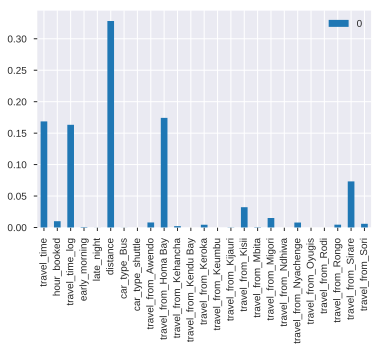

In [456]:
b=list(gbrt.feature_importances_[1:])
pd.DataFrame(index=feature_cols,data=b).plot.bar()


We can clearly see that some features are far more important than some others. While we can just minually remove them. It is better we use the sklearn.feature_selection recursive feature selection with or without cross validation tool (it is better with cv).



In [462]:
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE,RFECV
select = RFECV(gbrt,cv=5)
select.fit(Utrain,y_train)

RFECV(cv=5,
   estimator=GradientBoostingRegressor(alpha=0.9, criterion='mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=...te=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
   min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

In [463]:
select.n_features_


12

We see that the feature selection tool reduced the features from about 25 to 12



In [466]:
cv = cross_val_score (select,Utrain,y_train,cv=5)
print(" Average CV is: ", cv.mean())
Ypred=select.predict(Utest)
MAE=mean_absolute_error(y_test,Ypred)
print("GBR MAE:", MAE)
print("GBR Training set score: {:.5f}".format(select.score(Utrain,y_train)))
print("GBR Test set score: {:.5f}".format(select.score(Utest,y_test)))

 Average CV is:  0.5481069176574771
GBR MAE: 3.932134312902642
GBR Training set score: 0.56708
GBR Test set score: 0.55280


It can be seen that the metrics are almost the same for both sets of features but we prefer the select model because according to Ockham razor principle, you always want to the simplest model that performs best.

## Other implementation
While I tried out other implementations like xgboost, Adaboost, Light GBM, Decision trees, Extra trees and Random Forest, I didnt pay much attention to them as I started the challenge late and didnt have the time to tune every model. I also tried out tricks like PCA but the results were not better off than using just select.I focused only on Gradient Boosting. In hindsight, that may not have been the best decision.

I will however be sharing one other implementation I tried out with alongside gradient boosting (after heavy parameter tuning using Grid Search). Because of the time it took to grid-search, I will just be implementing the best model I obtained in my first grid-search range. To learn more about Grid Search ()



In [467]:
gbr = GradientBoostingRegressor(learning_rate=.3,random_state=100,n_estimators=220,subsample=0.75,
                                loss='lad').fit(Utrain,y_train)
select2 = RFECV(gbr,cv=5)
select2.fit(Utrain,y_train)

RFECV(cv=5,
   estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.3, loss='lad', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samp...=100, subsample=0.75, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
   min_features_to_select=1, n_jobs=None, scoring=None, step=1, verbose=0)

In [477]:
cv = cross_val_score (select2,Utrain,y_train,cv=5)
print(" Average CV is: ", cv.mean())
Ypred=select2.predict(Utest)
MAE=mean_absolute_error(y_test,Ypred)
print("GBR MAE:", MAE)
print("GBR Training set score: {:.5f}".format(select2.score(Utrain,y_train)))
print("GBR Test set score: {:.5f}".format(select2.score(Utest,y_test)))

 Average CV is:  0.5099447165835234
GBR MAE: 3.5600409228767407
GBR Training set score: 0.53987
GBR Test set score: 0.53224


In [478]:
import mlxtend


In [479]:
#You will need to install mlxtend 
from mlxtend.regressor import StackingCVRegressor

Since we cant use the stackingCVRegressor with the RFECV select model, we need to redefine our inputs such that the only the most informative features are used. (There is a slight increase from 12 - 18) because I choose to include all the categories of the travel_from.

In [481]:
feature_cols=['travel_time_log', 'travel_from_Awendo', 'distance','car_type_shuttle',
                   'travel_from_Homa Bay', 'travel_from_Kehancha', 'travel_from_Kendu Bay', 'travel_from_Keroka', 
                   'travel_from_Keumbu', 'travel_from_Kijauri', 'travel_from_Kisii', 'travel_from_Mbita', 'travel_from_Migori', 
                   'travel_from_Ndhiwa', 'travel_from_Nyachenge', 'travel_from_Rodi', 
                   'travel_from_Rongo', 'travel_from_Sirare', 'travel_from_Sori']

In [482]:
predicted_col=['number_of_tickets']


In [487]:

X=uber[feature_cols].values
y=uber[predicted_col].values

y_train=y_train.ravel()

split_test_size=0.3

from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=split_test_size, random_state=260)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


Stacking is a type of ensembling that combines the results of two or more estimators using another estimator. Please note that my implementation may not be the best. Stacking is supposed to be used when you are trying to merge the results of three very good estimators. I didn't optimize the decision tree and random forest models.

However, it can be seen that stacked model is not so far off from my best model (imagine the potential if I had used it on many highly tuned models).



In [488]:
lr=LinearRegression()
dt = DecisionTreeRegressor(criterion='mae',random_state=100)
rf = RandomForestRegressor(random_state=10,n_estimators=100)
gb = GradientBoostingRegressor(learning_rate=.3,random_state=100,n_estimators=220,subsample=0.75,
                               loss='lad')
stack = StackingCVRegressor(regressors=(gb, dt, rf),
                            meta_regressor=lr,cv=5)
stack.fit(Utrain,y_train)

StackingCVRegressor(cv=5,
          meta_regressor=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False),
          refit=True,
          regressors=(GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.3, loss='lad', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sa...imators=100, n_jobs=None,
           oob_score=False, random_state=10, verbose=0, warm_start=False)),
          shuffle=True, store_train_meta_features=False,
          use_features_in_secondary=False)

Below I will be slightly changing my implementation. I am using the mean_absolute_error as the scorer so I can easily see whether my model is generalizing well since mae is the objective metric is the challenge

In [489]:
from sklearn.metrics import make_scorer


In [493]:
cv = cross_val_score (stack,Utrain,y_train,cv=5,scoring=make_scorer(mean_absolute_error))
print("Average CV is:", round(cv.mean(),3),cv.std())
Ypred=stack.predict(Utest)
Ypred_t=stack.predict(Utrain)
MAE=mean_absolute_error(y_test,Ypred)
MAE_t=mean_absolute_error(y_train,Ypred_t)
print("GBR Training set score: {:.3f}".format(MAE_t))
print("GBR Test set score: {:.3f}".format(MAE))


Average CV is: 3.748 0.0796812257239874
GBR Training set score: 3.567
GBR Test set score: 3.701


After another set of gridsearch (ran for about five hours), my winning I came up with my best solution which ended out in the top 25% of all the submitted entries. My model ended up about 0.5 MAE behind winning model in the public leaderboard. I ran out of time to try out other grid search parameters unfortunately.

Below I will contrasting my model to a model of a friend that ended in the top 5% of all submitted entries (about 0.2 MAE behind the winning model)

In [496]:
gb=GradientBoostingRegressor(learning_rate=.5,random_state=100,n_estimators=250,subsample=0.75,loss='lad',
                            max_depth=4).fit(X_train,y_train)
cv = cross_val_score (gb,Utrain,y_train,cv=5,scoring=make_scorer(mean_absolute_error))
print("Average CV is:", round(cv.mean(),3),cv.std())
Ypred=gb.predict(X_test)
Ypred_t=gb.predict(X_train)
MAE=mean_absolute_error(y_test,Ypred)
MAE_t=mean_absolute_error(y_train,Ypred_t)
print("GBR Training set score: {:.3f}".format(MAE_t))
print("GBR Test set score: {:.3f}".format(MAE))

Average CV is: 3.603 0.0783262017010333
GBR Training set score: 3.412
GBR Test set score: 3.587


The major difference between the two implementation is the range of Grid Search. While I constrained myself, his grid search was more extensive but it took about 3 days for these parameters to be obtained. His implementation is available in the folder.

Finally, I will be sharing something I learnt from a friend after I shared this concern with him after the competition ended: Randomized Search. Randomized Search is similar to Grid Search. The only difference is not available permutations are tested. It randomly picks a specified amount of permutations as defined by you. This could save you a lot of time and helps you choose a more extensive range of search parameters.

In [497]:
from sklearn.model_selection import RandomizedSearchCV


In [498]:
#There are about 300,000 different combinations in the grid defined below. We would be using random search to pick just ten
#and see how our model fairs (we do tgis using n_iter)

estimator = GradientBoostingRegressor(random_state=12)
param = {'learning_rate':[0.001, 0.003,.01,0.03,0.05,0.1,0.3,0.5,1,3,5 ],
        'n_estimators':[i for i in range(50,550,10)],
        'subsample':[i/100 for i in range(50,100,5)],
        'loss':['lad','ls','huber'],
        'max_depth':[i for i in range(1,20)]}
rs=RandomizedSearchCV(estimator, param_distributions = param, 
                      n_iter=10, n_jobs=-1, random_state=81,cv=3,
                     return_train_score=True)
rs.fit(X_train,y_train)

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...te=12, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=-1,
          param_distributions={'learning_rate': [0.001, 0.003, 0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 1, 3, 5], 'n_estimators': [50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 43...', 'ls', 'huber'], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
          pre_dispatch='2*n_jobs', random_state=81,

In [499]:
a=pd.DataFrame(rs.cv_results_)
a.sort_values('rank_test_score').head().transpose()

,8,2,1,4,9
mean_fit_time,5.73,2.84,12.42,15.33,0.29
std_fit_time,0.56,0.01,0.09,0.43,0.00
mean_score_time,0.02,0.02,0.04,0.05,0.00
std_score_time,0.00,0.00,0.00,0.00,0.00
param_subsample,0.75,0.60,0.50,0.65,0.50
param_n_estimators,330,350,230,450,100
param_max_depth,7,4,18,10,1
param_loss,lad,lad,lad,lad,lad
param_learning_rate,0.01,0.10,0.05,0.10,0.30
params,"{'subsample': 0.75, 'n_estimators': 330, 'max_...","{'subsample': 0.6, 'n_estimators': 350, 'max_d...","{'subsample': 0.5, 'n_estimators': 230, 'max_d...","{'subsample': 0.65, 'n_estimators': 450, 'max_...","{'subsample': 0.5, 'n_estimators': 100, 'max_d..."


In [500]:

cv = cross_val_score (rs,Utrain,y_train,cv=5,scoring=make_scorer(mean_absolute_error))
print("Average CV is:", round(cv.mean(),3),cv.std())
Ypred=rs.predict(X_test)
Ypred_t=rs.predict(X_train)
MAE=mean_absolute_error(y_test,Ypred)
MAE_t=mean_absolute_error(y_train,Ypred_t)
print("GBR Training set score: {:.3f}".format(MAE_t))
print("GBR Test set score: {:.3f}".format(MAE))

Average CV is: 3.597 0.06944561903412373
GBR Training set score: 3.490
GBR Test set score: 3.607


It can be seen that while the implementation above is somewhat simple and time-efficient. The metrics are not particularly bad. One can rerun the search a few number of times and see whether there is a trend in the chosen parameter and then grid search based on the smaller range. One could also random search for a larger number of times.

## Conclusion
I heard that a top 5 model used Genetic Algorithm for its parameter tuning. Apparently, the person had a lot of time for the tuning as GA is very time-consuming like Grid Search. This may not be possible in a short hackathons or even in some real life scenerios where time is severly limited.

This notebook have taken us through some very important concepts in data science (EDA, Feature Selection, Stacking, HypperParameter Tuning) using the uber data from Zindi. It is specifically desined for those who are just starting their data science journey especially as regards working with real-life data. I hope you find it informative.

P.S: Any other top solution could just clone this notebook and mention one or two two things that made their model stand out if they dont have the time to share an extensive notebook like this.